# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

***Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavlijevic***

## Stage 1: Data Cleaning and Preprocessing and EDA

In [75]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


In [40]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kokit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Data Collection and Cleaning.

o Acquire a comprehensive dataset of cleantech texts.

o Perform data cleaning to remove irrelevant information, special characters, and duplicates.

In [2]:
# Setting the path and Loading the data from csv file
from pathlib import Path
print(Path.cwd())

data_folder = Path("dataset/cleantech_media_dataset_v1_20231109.csv")
data_folder


c:\Users\kokit\OneDrive - Hochschule Luzern\Study Docuemnts\Semester-4\CLT\Project\NLP


WindowsPath('dataset/cleantech_media_dataset_v1_20231109.csv')

In [26]:
#Opening the kaggle dt file and assigning it to a variable
data = pd.read_csv(data_folder)
data.head()


,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


In [27]:
print(data.shape)
data.info()

(9607, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9607 non-null   int64 
 1   title       9607 non-null   object
 2   date        9607 non-null   object
 3   author      31 non-null     object
 4   content     9607 non-null   object
 5   domain      9607 non-null   object
 6   url         9607 non-null   object
dtypes: int64(1), object(6)
memory usage: 525.5+ KB


We have only 31 authors out 9607 rows of data, and due to data redundancy it is good to drop the authors and drop unneccessary columns

In [30]:
duplicate_rows = data[data.duplicated(subset=['title'])]

In [31]:
print(duplicate_rows)

      Unnamed: 0                                              title  \
820         6483  Macquarie targets North Sea as the green energ...   
891         6557  GE blocked from selling huge offshore turbine ...   
918         6584  Liz Truss opposes solar panels on farmland, Do...   
931         6597  Green hydrogen seen competing with LNG within ...   
987         6656  XR goes big on fake oil in protests at SLB, In...   
992         6661  Aberdeen’ s NZTC plans national centre for geo...   
998         6667  Truss, Johnson Join Rebellion Against Sunak fo...   
1034        6705  BEIS mulls ringfenced CfD support for geotherm...   
1047        6719  Key trends in UK renewables and what to expect...   
1057        6729  Five ways for the energy industry to shift the...   
1074        6747  Staggering potential in next-gen building bloc...   
1116        6790  Royal Opera House drops BP as sponsor after 33...   
3058       37413                   Cleantech Thought Leaders Series   
3059  

In [32]:
#Removing 'duplicate enteries' feature <- many duplicates exist in the dataset
data = data.drop_duplicates(subset=['title'], keep='first')

In [33]:
#resetting index after deleting duplicates
data = data.reset_index(drop=True)

In [35]:
print(data.shape)


(9583, 7)


Out of 9607 -> 9583 rows of data is now having unique information and title after removing duplicates.

In [36]:
# Removing 'author' feature <- many authors are missing
data.drop('author', axis=1, inplace=True)

In [37]:
# Removing 'Unsed columns'
data.drop('Unnamed: 0', axis=1, inplace=True)

In [38]:
data['content'][0]

'["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainability Report published on Wednesday, QP said its goals include `` reducing the emissions intensity of Qatar\'s LNG facilities by 25% and of its upstream facilities by at least 15%. \'\' The company is also aiming to reduce gas flaring intensity across its upstream facilities by more than 75% and has raised its carbon capture and storage ambitions from 5 million tons/yr to 7 million tons/yr by 2027. About 2.2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project. A further 1.1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar\'s LNG capacity by a further 16 million tons/yr. Qatar currently has an LNG production capacity of around 78 million tons

# Text Preprocessing

In [44]:
# Text preprocessing
porter = PorterStemmer()
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()

    # removing punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    #tokenize the text into words
    tokens = word_tokenize(text)

    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word.lower() not in stop_words]

    #stemming
    stemmed_tokens= [porter.stem(word) for word in tokens]

  

    # Join the tokens to strings
    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

data['cleaned_content'] = data['content'].apply(clean_text)

In [46]:
# Print the first few rows of 'cleaned_content' after cleaning
print("\nAfter Cleaning:")
print(data['cleaned_content'].head())


After Cleaning:
0    qatar petroleum qp targeting aggressive cuts g...
1    nuclear power corp india ltd npcil synchronize...
2    new us president joe biden took office week us...
3    slow pace japanese reactor restarts continues ...
4    two new york citys largest pension funds say d...
Name: cleaned_content, dtype: object


In [47]:
print(data['cleaned_content'][0])

qatar petroleum qp targeting aggressive cuts greenhouse gas emissions prepares launch phase 2 planned 48 million ton per year lng expansion latest sustainability report published wednesday qp said goals include reducing emissions intensity qatars lng facilities 25 upstream facilities least 15 company also aiming reduce gas flaring intensity across upstream facilities 75 raised carbon capture storage ambitions 5 million tonsyr 7 million tonsyr 2027 22 million tonsyr carbon capture goal come 32 million tonyr phase 1 lng expansion also known north field east project 11 million tonsyr come phase 2 known north field south project raise qatars lng capacity 16 million tonsyr qatar currently lng production capacity around 78 million tonsyr eyeing phased expansion 126 million tonsyr qp says able eliminate routine gas flaring 2030 methane emissions limited setting methane intensity target 02 across facilities 2025 company also plans build 16 gigawatts solar energy capacity 2025 half come siraj s

 # Explanatory Data Analysis

##### Basic Statistics -- Word Counts, Document Lengths, Term Frequencies

In [50]:

   # calculate word counts, document lengths
# add simple word count
data['word_counts'] = data['cleaned_content'].apply(lambda x: len(str(x).split()))
#add simple document length
data['doc_length'] = data['cleaned_content'].apply(len)
# add polarity
data['polarity'] = data['cleaned_content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)


In [54]:
polarity_fr = data['polarity'][0]
print(polarity_fr)

0.03843073593073593


In [59]:
# Print basic statistics
print("Basic Statistics")
print("Word Counts", data['word_counts'].describe())
print("\nDocument Length ", data['doc_length'].describe())

Basic Statistics
Word Counts count    9583.000000
mean      464.084942
std       264.185780
min       110.000000
25%       263.000000
50%       401.000000
75%       595.000000
max      1813.000000
Name: word_counts, dtype: float64

Document Length  count     9583.000000
mean      3568.172702
std       2032.158063
min        795.000000
25%       2023.500000
50%       3089.000000
75%       4560.500000
max      15336.000000
Name: doc_length, dtype: float64


In [63]:
data.describe(include= [np.number])

,word_counts,doc_length,polarity
count,9583.000000,9583.000000,9583.000000
mean,464.084942,3568.172702,0.111361
std,264.185780,2032.158063,0.060723
min,110.000000,795.000000,-0.247789
25%,263.000000,2023.500000,0.072354
50%,401.000000,3089.000000,0.107955
75%,595.000000,4560.500000,0.147761
max,1813.000000,15336.000000,0.458333


In [72]:
# Term Frequencies
# Compute term frequencies
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform(data['cleaned_content'])

# Print term frequencies
print("Term Frequencies:")
print(term_frequencies)

Term Frequencies:
  (0, 74839)	2
  (0, 70565)	1
  (0, 74906)	6
  (0, 89195)	1
  (0, 13011)	1
  (0, 29229)	1
  (0, 44162)	1
  (0, 42054)	3
  (0, 35551)	3
  (0, 73194)	1
  (0, 55297)	1
  (0, 70697)	6
  (0, 71509)	1
  (0, 7861)	1
  (0, 61105)	9
  (0, 91419)	1
  (0, 70147)	1
  (0, 100053)	2
  (0, 56806)	8
  (0, 37936)	5
  (0, 55230)	1
  (0, 88347)	1
  (0, 77444)	1
  (0, 74403)	1
  (0, 97378)	1
  :	:
  (9582, 74372)	1
  (9582, 73612)	1
  (9582, 69864)	1
  (9582, 62705)	1
  (9582, 92005)	2
  (9582, 27705)	1
  (9582, 64829)	1
  (9582, 84806)	2
  (9582, 51684)	1
  (9582, 41111)	1
  (9582, 85012)	1
  (9582, 22236)	2
  (9582, 56782)	2
  (9582, 61021)	1
  (9582, 15868)	1
  (9582, 15703)	4
  (9582, 86830)	1
  (9582, 78632)	1
  (9582, 96105)	4
  (9582, 63245)	1
  (9582, 15767)	1
  (9582, 31494)	1
  (9582, 98386)	1
  (9582, 87080)	1
  (9582, 100411)	1


In [73]:
# Convert the sparse matrix to a dense array
dense_term_frequencies = term_frequencies.toarray()

# Print the dense array
print("Dense Term Frequencies:")
print(dense_term_frequencies)


Dense Term Frequencies:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
feature_names = vectorizer.get_feature_names_out()
print("Feature Names:")
print(feature_names)


Feature Names:
['00' '000' '0000' ... 'zwolinski' 'zx' 'zyryanov']


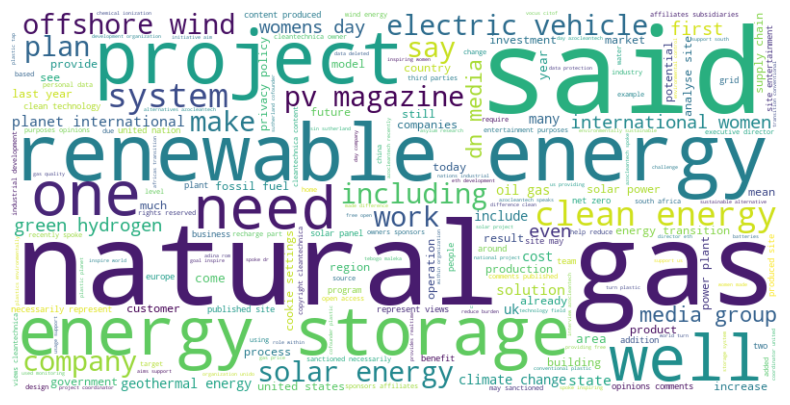

In [76]:
# Create word clouds to visualize the most frequent terms.
# Combine all cleaned content into a single string
all_text = ' '.join(data['cleaned_content'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

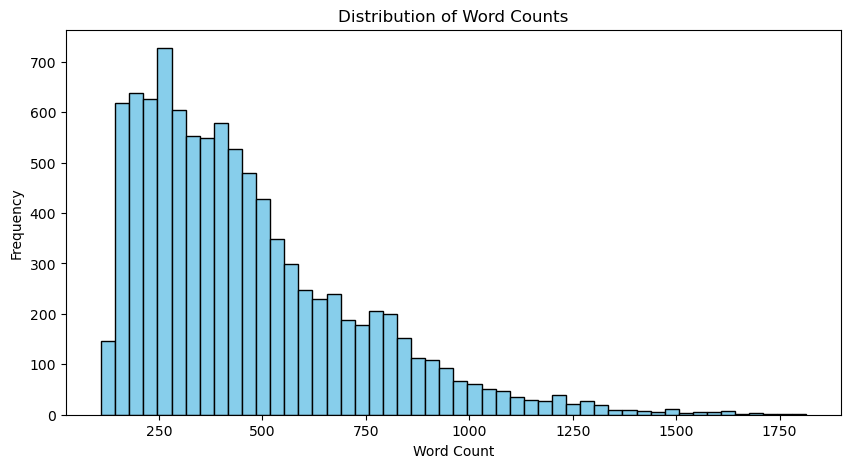

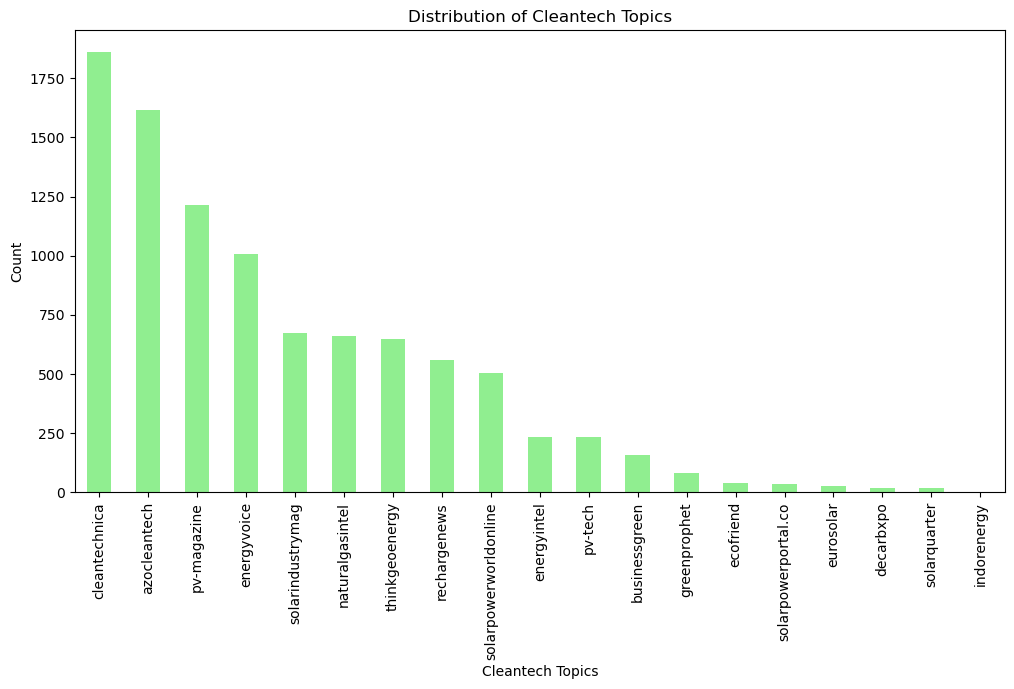

In [81]:
# Plot histogram for word counts
plt.figure(figsize=(10, 5))
plt.hist(data['word_counts'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart for major cleantech topics based on 'domain'
plt.figure(figsize=(12, 6))
data['domain'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Cleantech Topics')
plt.xlabel('Cleantech Topics')
plt.ylabel('Count')
plt.show()